<a href="https://colab.research.google.com/github/Nubiancodingdelight/ACS-Project-Repository-/blob/main/Generating_VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by: Lorrayya Williams
Last Modified: April 10, 2025
The purpose of this file is to extract DeepVisp data and place it into spreadsheets.

In [1]:
#mounts google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
#set path
%cd /content/drive/MyDrive/ACS_Research/VISDB_Data/

/content/drive/MyDrive/ACS_Research/VISDB_Data


In [3]:
#install Biopython and pyfaidx
!pip install Bio pyfaidx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.1 MB/s eta 0:00:00


In [36]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyfaidx import Fasta

# FUNCTIONS

## Virus sequence extract


In [46]:
#name: Name of Virus
#ref: Specific  Viral Sequence
def virus_seq_extract(name, ref, start, stop):
  ref = ref.strip(' ')
  #location of fasta sequence
  if name == 'HBV':
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/' +name+ "/"+ "sequence.fasta"
    virus_gene = Fasta(path)
    if ref in virus_gene.keys():
      extracted_seq = virus_gene[ref][start-1:stop]
    elif ref in ('NC_003977.1', 'NC_003977'):
      path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/HBV/NC_003977.1.fasta'
      virus_gene = Fasta(path)
      extracted_seq = virus_gene['NC_003977.1'][start-1:stop]

  elif name == 'HPV':
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/HPV/'  + ref + '.fasta'
    virus_gene = Fasta(path)
    extracted_seq = virus_gene[ref][start-1:stop]

  elif name == 'EBV':
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/EBV/NC_007605.1.fasta'
    virus_gene = Fasta(path)
    extracted_seq = virus_gene['NC_007605.1'][start-1:stop]

  else:
    print(f"Reference {ref} not found in {name}")
  return extracted_seq.seq

In [6]:
#testing virus
virus_seq_extract('HPV', 'NC_001526.2',36878593, 1000)

''

## Human Reference sequence extract

In [110]:
def human_seq_extract(ref, chr,viral_len, start, stop):
  import random
  ref_num = 2000 - viral_len
  num1 = random.randint(1, ref_num)
  num2 = ref_num -num1
  seq_list = []
  #hg19 human reference genome
  if ref.lower() in ('grch37/hg19','hg19','grch37'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg19/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-num1:start].seq)
      seq_list.append(genes[0][stop:stop+num2].seq)
      seq_list.append(genes[0][start-num1:stop+num2].seq)
    else:
      seq_list.append(genes[0][start:start+num1].seq)
      seq_list.append(genes[0][stop-num2:stop].seq)
      seq_list.append(genes[0][stop-num2:start+num1].seq)

  #hg38 human reference
  elif ref.lower() in ('hg38'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg38/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-num1:start].seq)
      seq_list.append(genes[0][stop:stop+num2].seq)
      seq_list.append(genes[0][start-num1:stop+num2].seq)
    else:
      seq_list.append(genes[0][start:start+num1].seq)
      seq_list.append(genes[0][stop-num2:stop].seq)
      seq_list.append(genes[0][stop-num2:start+num1].seq)


  #All other references
  else:
    #hg38
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/'+ref + '/' + chr + '.fasta'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-num1:start].seq)
      seq_list.append(genes[0][stop:stop+num2].seq)
      seq_list.append(genes[0][start-num1:stop+num2].seq)
    else:
      seq_list.append(genes[0][start:start+num1].seq)
      seq_list.append(genes[0][stop-num2:stop].seq)
      seq_list.append(genes[0][stop-num2:start+num1].seq)
  return seq_list

In [88]:
#testing
print(human_seq_extract('hg19', 'chr1', 100,1000, 1200))

680
1220
['NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

In [9]:
#testing
#print(human_seq_extract('AL360074', 'chr1', 100, 200))

##Lowercases all column names and replaces spaces with underscores

In [10]:
def lower_case_and_underscore(df):
  """Lowercases all column names and replaces spaces with underscores."""
  new_columns = [col.lower().replace(' ', '_') for col in df.columns]
  df.columns = new_columns
  return df

# **HBV**

### Load Data

In [11]:
#load xslx
hbv_df = pd.read_excel('HBV_VIS.xlsx')
hbv_df.head()

,Virus,Virus subtype,Reference virus genome,Begin breakpoint,Stop breakpoint,Chromosome,Locus,Reference human genome,Begin location,End location,Sample,Disease,Method,PubMed ID,Target gene
0,HBV,NaN,FJ562281.1,1782.0,NaN,chr9,q31.1,GRCh38,100940295.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,CORO2A
1,HBV,NaN,GQ377546.1,1820.0,NaN,chr9,q31.1,GRCh38,101030026.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
2,HBV,NaN,KC792890.1,1471.0,NaN,chr3,p26.3,GRCh38,2002381.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
3,HBV,NaN,FJ622847.1,689.0,NaN,chr2,q35,GRCh38,216281034.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
4,HBV,NaN,KF166416.1,1807.0,NaN,chr16,q12.1,GRCh38,51320015.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN


## Data Cleaning

In [12]:
#make all values lowercase
hbv_df = lower_case_and_underscore(hbv_df)

In [13]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA
hbv_df = hbv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
hbv_df.head()

,virus,virus_subtype,reference_virus_genome,begin_breakpoint,stop_breakpoint,chromosome,locus,reference_human_genome,begin_location,end_location,sample,disease,method,pubmed_id,target_gene
346,HBV,NaN,X70185.1,1720.0,1603.0,chr1,q21.1,GRCh37/hg19,420.0,437.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,ANP32E
347,HBV,NaN,X70185.1,1246.0,1390.0,chr1,p21.3,GRCh37/hg19,97732036.0,97732056.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,DPYD
348,HBV,NaN,X70185.1,1603.0,1664.0,chr1,q31.3,GRCh37/hg19,194161891.0,194161910.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,NaN
349,HBV,NaN,X70185.1,1623.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B
350,HBV,NaN,X70185.1,1638.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B


In [14]:
# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
hbv_df = hbv_df[hbv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]
hbv_df['reference_human_genome'].unique()


array(['GRCh37/hg19', 'GRCh37'], dtype=object)

## Data Visualization

In [15]:
import natsort
chromosome_counts = hbv_df.sort_values(by='chromosome')['chromosome'].value_counts()
chromosome_counts = chromosome_counts.reindex(natsort.natsorted(chromosome_counts.index))

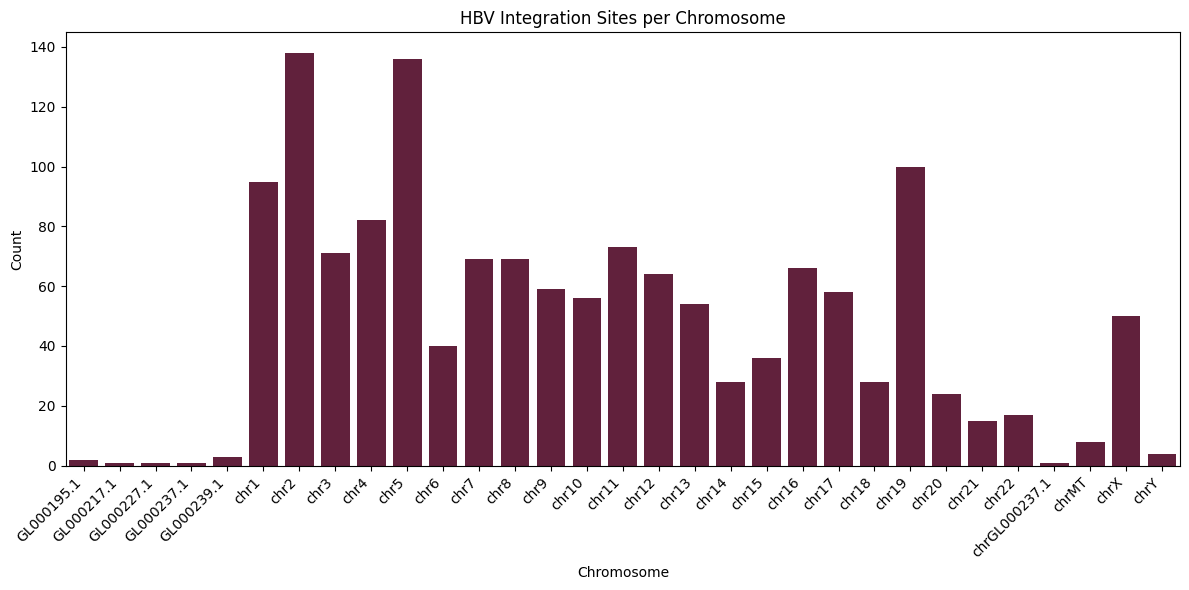

In [16]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=chromosome_counts.index, y=chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('HBV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Data Extraction

In [ ]:
#loop through data
seq_list =[]
for ind, row in hbv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      begin_breakpoint = int(row['begin_breakpoint'])
      stop_breakpoint = int(row['stop_breakpoint'])
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      human_seq = human_seq_extract(hum_ref, chrom,len(viral_seq), begin_ref, stop_ref )
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref,begin_ref, stop_ref, hum_ref, begin_breakpoint, stop_breakpoint, spliced_seq, viral_seq, human_seq[2], human_seq[0], human_seq[1]])

    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass




In [111]:
#make seq_list a dataframe save as a csv
hbv_seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'begin_ref', 'stop_ref', 'human_ref','begin_breakpoint', 'stop_breakpoint', 'spliced_seq', 'viral_seq', 'human_ref_sequence', 'human_seq_upstream', 'human_seq_downstream'])
hbv_seq_df.to_csv('Spliced_Data_HBV.csv')


In [112]:
# prompt: print spliced_seq where the length is not equal to 2000

# Assuming hbv_seq_df is already created as in the provided code.

for index, row in hbv_seq_df.iterrows():
    if len(row['spliced_seq']) != 2000:
        #print(row['spliced_seq'])
        print(row['viral_seq'])
        print(len(row['viral_seq']))



0
CTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCAGCAATGTCAACGACCGACCTTGAGGCCTACTTCAAAGACTG
80
AGGTCTTACATAAGAGGACTCTTGGACTCTCAGCAATGTCAACGACCGACCTTGAG
56
GTCTCTGCCAAGTGTTTGCTGACGCAACCCCCACGGGTTGGGGCTTGGCCATAGGCCATCGGCGCATGCGTGGAACCTTTGTGGCTCCTCTGCCGATCCATACTGCGGAACTCCTAGCAGCTTGTTTTGCTCGCAGCCGGTCTGGAGCGAAACTTATCGGAACCGACAACTCAGTTGTCCTCTCTCGGAAATACACCTCCTTTCCATGGCTGCTAGGCTGTGCTGCCAACTGGATCCTGCGCGGGACGTCCTTTGTCTACGTCCCGTCGGCGCTGAATCCCGCGGACGACCCGTCTCGGGGCCGTTTGGGCCTCTACCGTCCCCTTCTTCATCTGCCGTTCCGGCCGACCACGGGGCGCACCTCTCTTTACGCGGTCTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTAGCATGGAGACCACCGTGAACGCCCACCAGGTCTTGCCCAAGGTCTTACACAAGAGGACTCTTGGACTCTCAGCAATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAGGAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGTTCACCAGCACCATGCAACTTTTTCCCCTCTGCCTAATCATCTCATGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGGTGGCTTTGGGGCATGGACATTGACCCGTATAAAGAATTTGGAGCTTCTGTGGAGTTACTCTCTTTTTTGCCTTCTGACTTCTTTCCTTCTATTCGAGATCTCCTCGACACCGCCTCTGCTCTGTATCGGGAGG

# HPV

## Load Data

In [19]:
#load xslx
hpv_df = pd.read_excel('HPV_VIS.xlsx')
hpv_df.head()

,Virus,Virus subtype,Reference virus genome,Begin breakpoint,Stop breakpoint,Chromosome,Locus,Reference human genome,Begin location,End location,Sample,Disease,Method,PubMed ID,Target gene
0,HPV,HPV16,NC_001526.4,NaN,NaN,chr1,p36.22,NCBI36/hg18,9819841.0,NaN,Tumor,Cervical intraepithelial neoplasia,PCR Ion Torrent Sequencing,26660085,NaN
1,HPV,HPV16,NC_001526.4,NaN,NaN,chr3,p11.2,NCBI36/hg18,88525362.0,NaN,Tumor,Cervical intraepithelial neoplasia,PCR Ion Torrent Sequencing,26660085,NaN
2,HPV,HPV16,NC_001526.4,NaN,NaN,chr9,q33.3,NCBI36/hg18,126313825.0,NaN,Tumor,Cervical intraepithelial neoplasia,PCR Ion Torrent Sequencing,26660085,NaN
3,HPV,HPV16,NC_001526.4,NaN,NaN,chr10,q24.2,NCBI36/hg18,99428623.0,NaN,Tumor,Cervical intraepithelial neoplasia,PCR Ion Torrent Sequencing,26660085,NaN
4,HPV,HPV16,NC_001526.4,NaN,NaN,chr15,q24.2,NCBI36/hg18,74295689.0,NaN,Tumor,Cervical intraepithelial neoplasia,APOT and sequencing,26660085,ETFA


## Data Cleaning

In [20]:
hpv_df = lower_case_and_underscore(hpv_df)


In [21]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA
hpv_df = hpv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
hpv_df.head()

,virus,virus_subtype,reference_virus_genome,begin_breakpoint,stop_breakpoint,chromosome,locus,reference_human_genome,begin_location,end_location,sample,disease,method,pubmed_id,target_gene
4148,HPV,HPV16,AF125673.1,2827.0,3062.0,chr2,NaN,GRCh37/hg19,28595279.0,28595577.0,Cell line,Cervical carcinoma,APOT and sequencing,29364907,NaN
4149,HPV,HPV16,AF125673.1,2505.0,3062.0,chr2,NaN,GRCh37/hg19,28595311.0,28595730.0,Cell line,Cervical carcinoma,APOT and sequencing,29364907,NaN
4150,HPV,HPV16,AF125673.1,2173.0,2575.0,chr2,NaN,GRCh37/hg19,28595585.0,28595729.0,Cell line,Cervical carcinoma,APOT and sequencing,29364907,NaN
4151,HPV,HPV16,AF125673.1,3151.0,3678.0,chr2,NaN,GRCh37/hg19,28595716.0,28596131.0,Cell line,Cervical carcinoma,APOT and sequencing,29364907,NaN
4152,HPV,HPV16,AF125673.1,3693.0,4038.0,chr2,NaN,GRCh37/hg19,28595741.0,28595968.0,Cell line,Cervical carcinoma,APOT and sequencing,29364907,NaN


In [22]:
# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
hpv_df = hpv_df[hpv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]
hpv_df['reference_human_genome'].unique()


array(['GRCh37/hg19'], dtype=object)

##Data Visualization

In [23]:
import natsort
hpv_chromosome_counts = hpv_df.sort_values(by='chromosome')['chromosome'].value_counts()
hpv_chromosome_counts = hpv_chromosome_counts.reindex(natsort.natsorted(hpv_chromosome_counts.index))

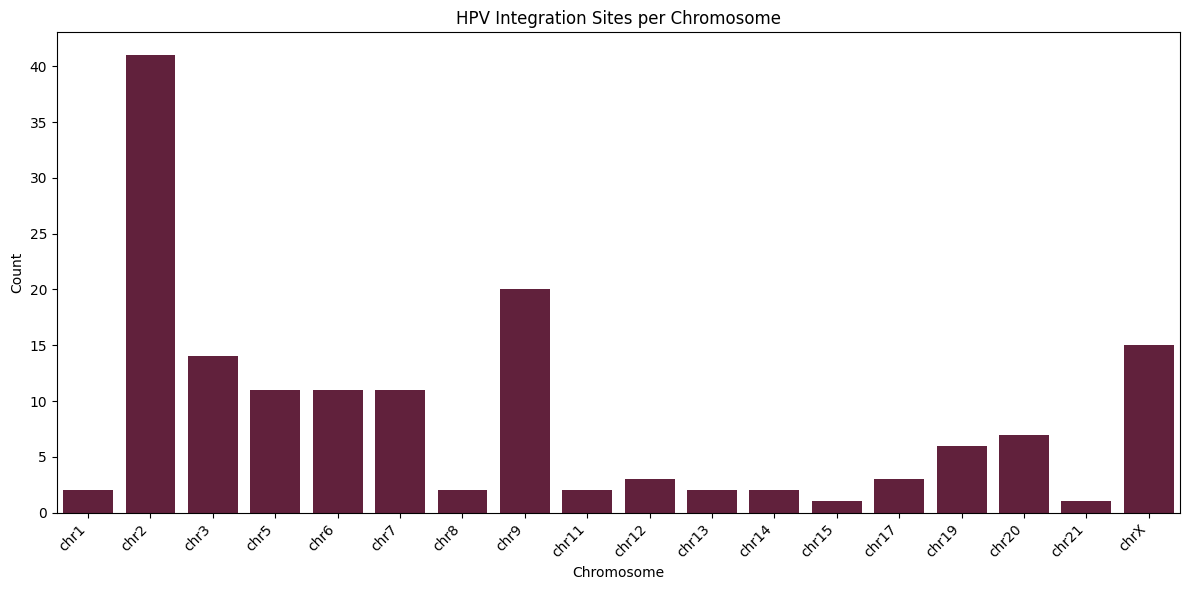

In [24]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hpv_chromosome_counts.index, y=hpv_chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('HPV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Data Extraction

In [116]:

#loop through data
seq_list =[]
for ind, row in hpv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      begin_breakpoint = int(row['begin_breakpoint'])
      stop_breakpoint = int(row['stop_breakpoint'])
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      human_seq = human_seq_extract(hum_ref, chrom,len(viral_seq), begin_ref, stop_ref )
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref,begin_ref, stop_ref, hum_ref, begin_breakpoint, stop_breakpoint, spliced_seq, viral_seq, human_seq[2], human_seq[0], human_seq[1]])
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} Virus Begin Breakpoint: {row['begin_breakpoint']} Virus Stop Breakpoint: {row['stop_breakpoint']} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass



In [117]:
#make seq_list a dataframe save as a csv
hpv_seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'begin_ref', 'stop_ref', 'human_ref','begin_breakpoint', 'stop_breakpoint', 'spliced_seq', 'viral_seq', 'human_ref_sequence', 'human_seq_upstream', 'human_seq_downstream'])
hpv_seq_df.to_csv('Spliced_Data_HPV.csv')

# EBV

## Load Data

In [27]:
#load xslx into dataframe
ebv_df = pd.read_excel('EBV_VIS.xlsx')
ebv_df.head()

,Virus,Virus subtype,Reference virus genome,Begin breakpoint,Stop breakpoint,Chromosome,Locus,Reference human genome,Begin location,End location,Sample,Disease,Method,PubMed ID,Target gene
0,EBV,NaN,KC207813,NaN,NaN,chr6,NaN,GRCh37/hg19,91004306.0,91005711.0,cell line,B-cell lymphoma,RNA-Seq,25355872,BACH2
1,EBV,NaN,KC207813,NaN,NaN,chr6,NaN,GRCh37/hg19,91006199.0,91006488.0,cell line,B-cell lymphoma,RNA-Seq,25355872,BACH2
2,EBV,NaN,NC007605,132586.0,NaN,chr12,NaN,GRCh37/hg19,74764643.0,NaN,cell line,Nasopharyngeal carcinom,WGS,26819646,NaN
3,EBV,NaN,NC007605,9446.0,NaN,chr1,NaN,GRCh37/hg19,27648679.0,NaN,cell line,Nasopharyngeal carcinom,WGS,26819646,TMEM222
4,EBV,NaN,NC007605,54922.0,NaN,chr1,NaN,GRCh37/hg19,142314854.0,NaN,cell line,Nasopharyngeal carcinom,WGS,26819646,NaN


## Data Cleaning

In [28]:
#lowercase all values
ebv_df = lower_case_and_underscore(ebv_df)

In [29]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA
ebv_df = ebv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
ebv_df.head()

# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
ebv_df = ebv_df[ebv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]


## Data Visualization

In [30]:
import natsort
ebv_chromosome_counts = ebv_df.sort_values(by='chromosome')['chromosome'].value_counts()
ebv_chromosome_counts = ebv_chromosome_counts.reindex(natsort.natsorted(ebv_chromosome_counts.index))


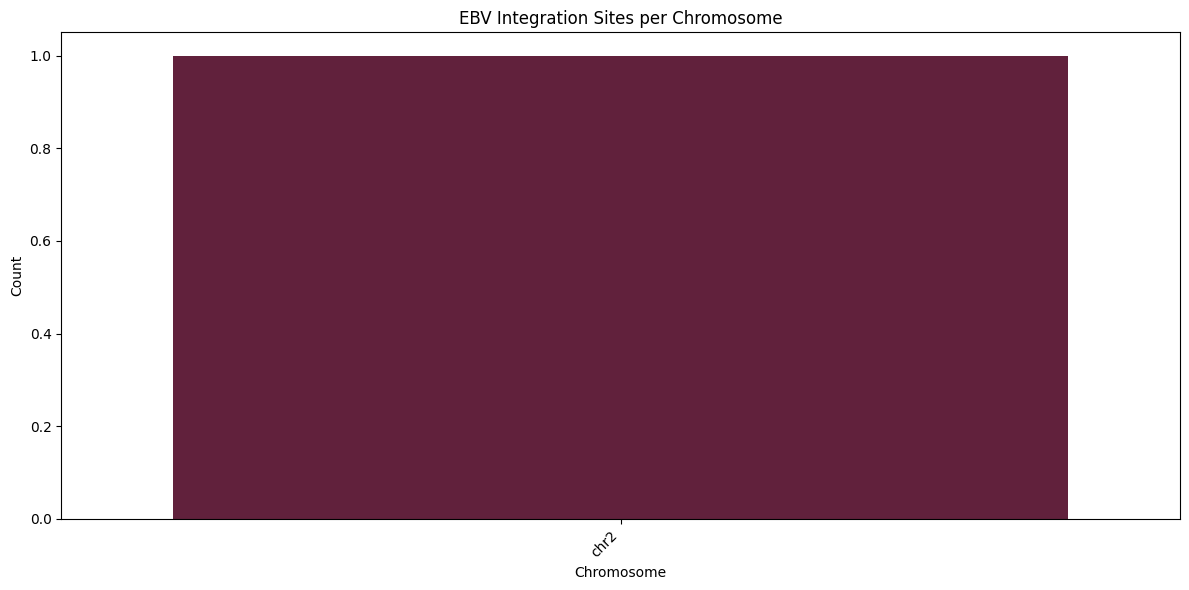

In [31]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ebv_chromosome_counts.index, y=ebv_chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('EBV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



## Data Extraction

In [113]:
#loop through data
seq_list =[]
for ind, row in ebv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      begin_breakpoint = int(row['begin_breakpoint'])
      stop_breakpoint = int(row['stop_breakpoint'])
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      human_seq = human_seq_extract(hum_ref, chrom,len(viral_seq), begin_ref, stop_ref )
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref,begin_ref, stop_ref, hum_ref, begin_breakpoint, stop_breakpoint, spliced_seq, viral_seq, human_seq[2], human_seq[0], human_seq[1]])
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass



In [114]:
#make seq_list a dataframe save as a csv
ebv_seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'begin_ref', 'stop_ref', 'human_ref','begin_breakpoint', 'stop_breakpoint', 'spliced_seq', 'viral_seq', 'human_ref_sequence', 'human_seq_upstream', 'human_seq_downstream'])
ebv_seq_df.to_csv('Spliced_Data_EBV.csv')

# Data Visualization

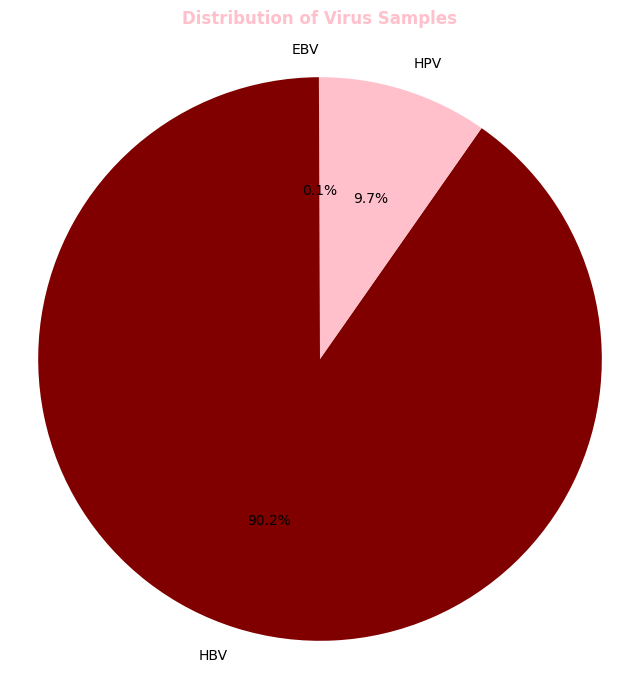

In [115]:
# prompt: make a pie chart with lengths of the ebv_seq_df, hbv_seq_df, hpv_seq_df use pink and burgundy for the colors

# Assuming ebv_seq_df, hbv_seq_df, and hpv_seq_df are already defined in the previous code

import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['EBV', 'HBV', 'HPV']
sizes = [len(ebv_seq_df), len(hbv_seq_df), len(hpv_seq_df)]
colors = ['pink', 'maroon'] # Define colors for the slices

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Virus Samples', loc='center', pad=20, fontweight='bold', color='pink')

plt.show()
